In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
train_dir = 'chest_xray/train'
val_dir = 'chest_xray/val'
test_dir = 'chest_xray/test'


In [ ]:
# Dataset Information
# train_pneumonia = 3875
# train_normal = 1341
# val_pneumonia = 8
# val_normal = 8
# test_pneumonia = 390
# test_normal = 234
# Total = 5856
# Train = 5216
# Val = 16
# Test = 624
# Pneumonia = 4273
# Normal = 1583
# Pneumonia/Normal = 2.7
# Train Pneumonia/Normal = 2.4
# Val Pneumonia/Normal = 1
# Test Pneumonia/Normal = 1.6
# Function to show all the details of dataset



In [4]:
 #Data Preprocessing
train_dir = 'chest_xray/train'
val_dir = 'chest_xray/val'
test_dir = 'chest_xray/test'

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 4434 images belonging to 2 classes.
Found 798 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 52s 315ms/step - accuracy: 0.7844 - loss: 0.4615 - val_accuracy: 0.6875 - val_loss: 0.5172
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 353ms/step - accuracy: 0.8970 - loss: 0.2463 - val_accuracy: 0.8125 - val_loss: 0.3004
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 378ms/step - accuracy: 0.9082 - loss: 0.2365 - val_accuracy: 0.6250 - val_loss: 1.0178
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 382ms/step - accuracy: 0.9284 - loss: 0.1845 - val_accuracy: 0.6250 - val_loss: 1.4496
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 383ms/step - accuracy: 0.9307 - loss: 0.1849 - val_accuracy: 0.6250 - val_loss: 0.7762
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 64s 389ms/step - accuracy: 0.9403 - loss: 0.1601 - val_accuracy: 0.6250 - val_loss: 0.8399
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 64s 390ms/step - accuracy: 0.9385 - loss: 0.1547 - val_accuracy: 0.6250 - val_loss: 0.8484
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 64s 393ms/step - accuracy: 0.9469 - loss: 0

In [14]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - accuracy: 0.8543 - loss: 0.6330
Test Accuracy: 89.74%


In [2]:
model.save('pneumonia_classifier.keras')

NameError: name 'model' is not defined

In [11]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog

In [12]:
def classify_image(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize image
    img_array = image.img_to_array(img) / 255.0             # Normalize image
    img_array = np.expand_dims(img_array, axis=0)            # Expand dimensions for model input

    prediction = model.predict(img_array)[0][0]              # Predict
    result = 'Pneumonia' if prediction > 0.5 else 'Normal'

    # Display the image
    plt.imshow(image.load_img(img_path))
    plt.title(f"Prediction: {result}")
    plt.axis('off')
    plt.show()

    return result

2025-03-17 08:46:18.762 python[62052:2006379] +[IMKInputSession subclass]: chose IMKInputSession_Modern


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


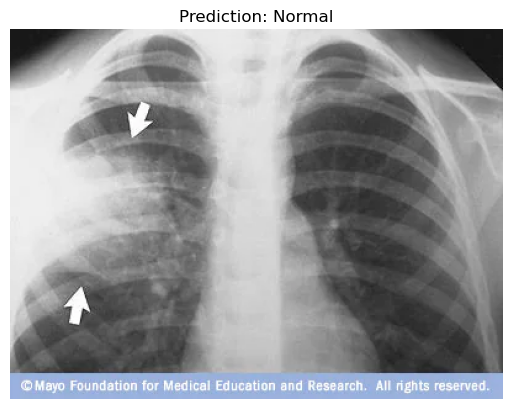

The uploaded image is classified as: Normal


In [14]:
def upload_and_predict():
    root = Tk()
    root.withdraw()  # Hide the Tkinter root window
    img_path = filedialog.askopenfilename(title='Select a Chest X-Ray Image')

    if img_path:
        result = classify_image(img_path, model)
        print(f'The uploaded image is classified as: {result}')
    else:
        print("No file selected.")

# Run the uploader function
upload_and_predict()

In [39]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# Define test data path
test_dir = "chest_xray/test"

# Image data generator for test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 624 images belonging to 2 classes.


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step
Accuracy: 89.74%

Classification Report:
              precision    recall  f1-score   support

      Normal       0.94      0.77      0.85       234
   Pneumonia       0.88      0.97      0.92       390

    accuracy                           0.90       624
   macro avg       0.91      0.87      0.89       624
weighted avg       0.90      0.90      0.90       624



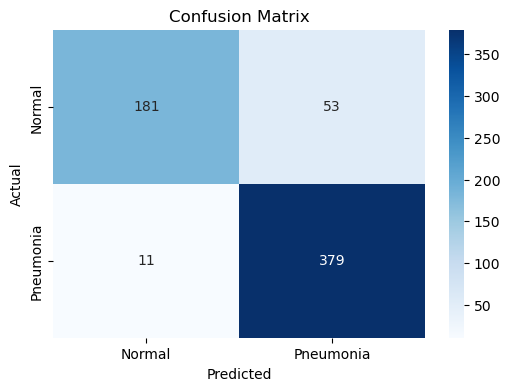

In [40]:
# Get true labels
y_true = test_generator.classes

# Predict labels
y_pred = (model.predict(test_generator) > 0.5).astype("int").reshape(-1)

# Accuracy score
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.2%}')

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Normal', 'Pneumonia']))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [5]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#sequence of layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
#load model
model = load_model('pneumonia_classifier.keras')
# Select the first convolutional layer

layer_outputs = [layer.output for layer in model.layers[:4]]  # First few layers
feature_map_model = Model(inputs=model.input, outputs=layer_outputs)

# Load a sample image from the test set
sample_img, _ = test_generator.next()

# Visualize Feature Maps
feature_maps = feature_map_model.predict(sample_img[0].reshape(1, 150, 150, 3))

plt.figure(figsize=(12, 8))
for i in range(min(8, feature_maps[0].shape[-1])):  # Visualizing 8 feature maps
    plt.subplot(2, 4, i + 1)
    plt.imshow(feature_maps[0][..., i], cmap='viridis')
    plt.axis('off')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


AttributeError: The layer sequential has never been called and thus has no defined input.

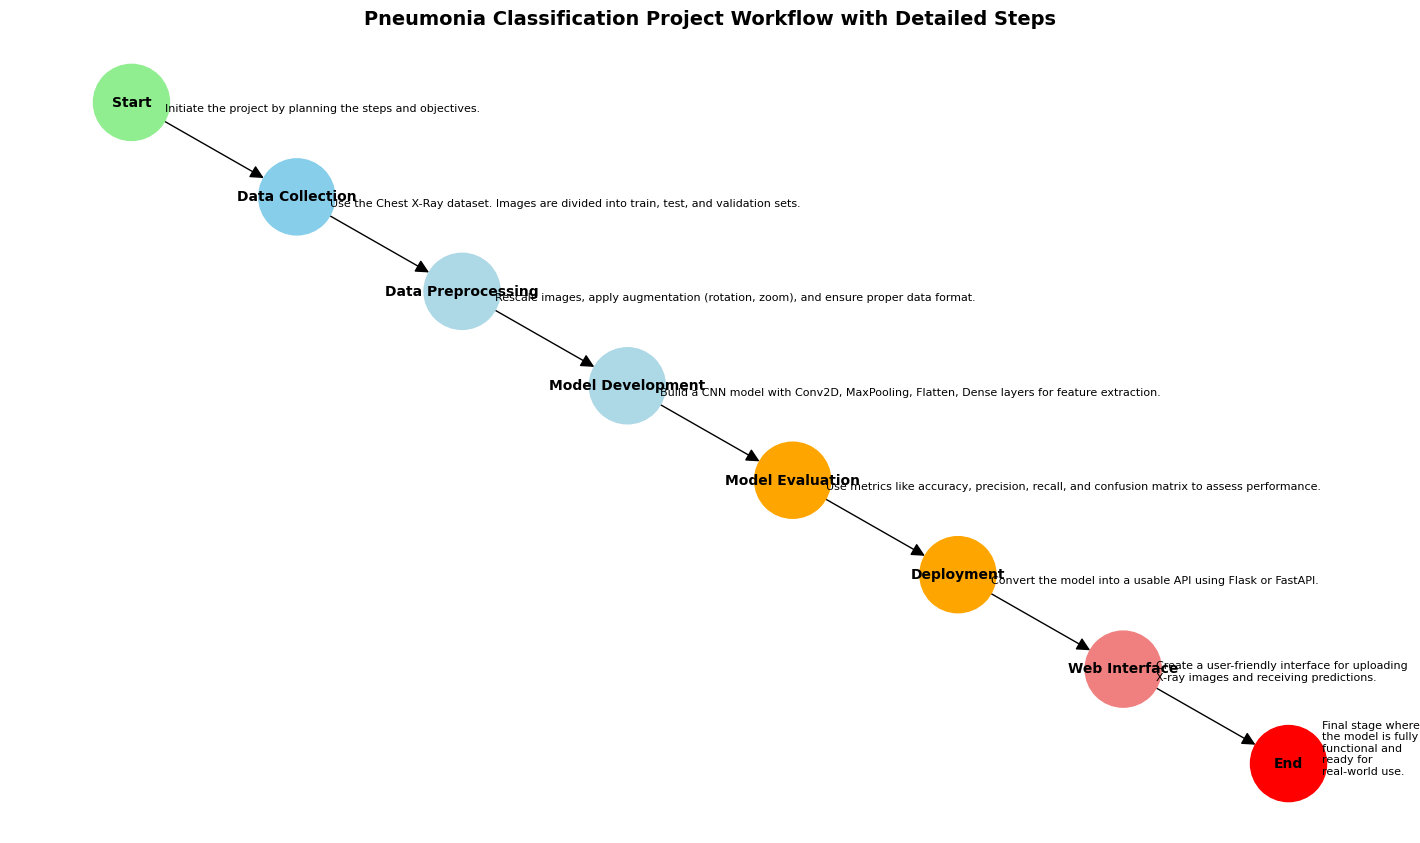

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

# Initialize a Directed Graph for workflow visualization
G = nx.DiGraph()

# Adding nodes with workflow steps
G.add_edges_from([
    ("Start", "Data Collection"),
    ("Data Collection", "Data Preprocessing"),
    ("Data Preprocessing", "Model Development"),
    ("Model Development", "Model Evaluation"),
    ("Model Evaluation", "Deployment"),
    ("Deployment", "Web Interface"),
    ("Web Interface", "End")
])

# Define the position of each node for better visualization
pos = {
    "Start": (0, 6),
    "Data Collection": (1, 5),
    "Data Preprocessing": (2, 4),
    "Model Development": (3, 3),
    "Model Evaluation": (4, 2),
    "Deployment": (5, 1),
    "Web Interface": (6, 0),
    "End": (7, -1)
}

# Node descriptions (detailed explanation for each step)
descriptions = {
    "Start": "Initiate the project by planning the steps and objectives.",
    "Data Collection": "Use the Chest X-Ray dataset. Images are divided into train, test, and validation sets.",
    "Data Preprocessing": "Rescale images, apply augmentation (rotation, zoom), and ensure proper data format.",
    "Model Development": "Build a CNN model with Conv2D, MaxPooling, Flatten, Dense layers for feature extraction.",
    "Model Evaluation": "Use metrics like accuracy, precision, recall, and confusion matrix to assess performance.",
    "Deployment": "Convert the model into a usable API using Flask or FastAPI.",
    "Web Interface": "Create a user-friendly interface for uploading X-ray images and receiving predictions.",
    "End": "Final stage where the model is fully functional and ready for real-world use."
}

# Create a color mapping for better visualization
node_colors = ['lightgreen', 'skyblue', 'lightblue', 'lightblue', 
                'orange', 'orange', 'lightcoral', 'red']

# Draw the graph with labels and custom styling
plt.figure(figsize=(14, 8))
nx.draw(G, pos, with_labels=True, 
        node_size=3000,            # Node size for clarity
        node_color=node_colors,    # Custom colors for different steps
        font_size=10,              # Text size for labels
        font_weight='bold',        # Bold text for readability
        arrows=True,               # Show directional arrows
        arrowsize=20               # Arrow size for better flow indication
        )

# Add text annotations for detailed descriptions
for node, (x, y) in pos.items():
    plt.text(x + 0.2, y - 0.1, descriptions[node], fontsize=8, wrap=True)

# Adding a descriptive title
plt.title("Pneumonia Classification Project Workflow with Detailed Steps", fontsize=14, fontweight='bold')

# Display the visualized workflow
plt.show()

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random


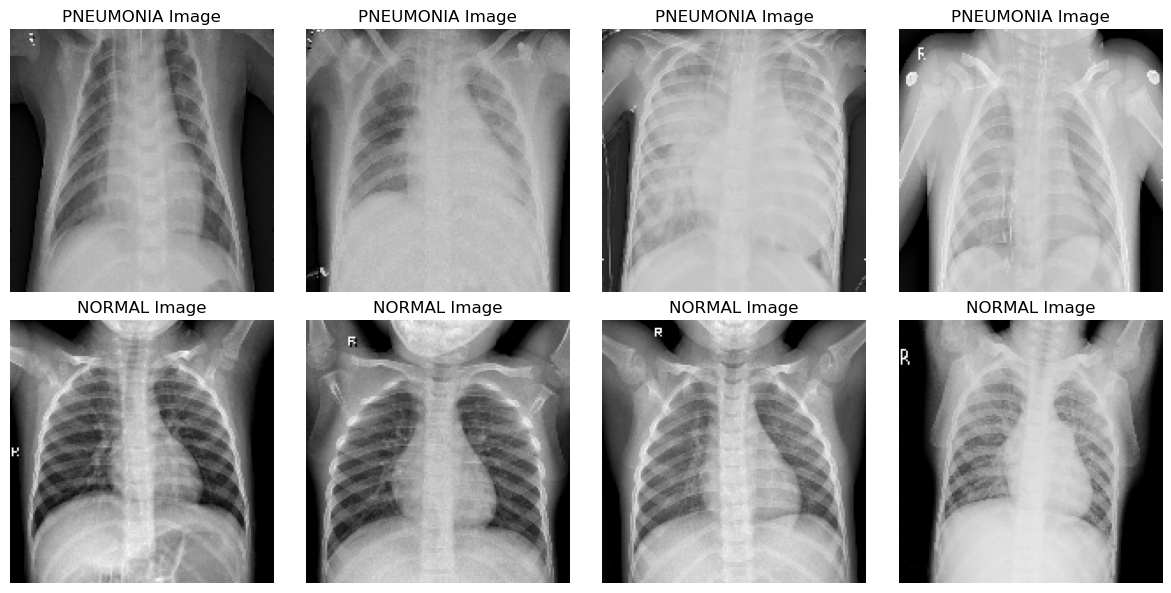

In [4]:
# Paths to dataset folders
dataset_path = 'chest_xray'
train_dir = os.path.join(dataset_path, 'train')
val_dir = os.path.join(dataset_path, 'val')
test_dir = os.path.join(dataset_path, 'test')

# Display sample images from each class
def display_sample_images():
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    classes = ['PNEUMONIA', 'NORMAL']

    for i, category in enumerate(classes):
        image_folder = os.path.join(train_dir, category)
        sample_images = random.sample(os.listdir(image_folder), 4)

        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(image_folder, img_name)
            img = load_img(img_path, target_size=(150, 150))
            axes[i, j].imshow(img)
            axes[i, j].set_title(f'{category} Image')
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# Displaying Visualizations
# visualize_class_distribution()
display_sample_images()


In [1]:
import os
import shutil
import random

# Set random seed for reproducibility
random.seed(42)

# Define paths
base_dir = 'chest_xray'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# Ensure val directories exist
for category in ['NORMAL', 'PNEUMONIA']:
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)

# Move 15% of images from train to val for both categories
split_ratio = 0.15

for category in ['NORMAL', 'PNEUMONIA']:
    source_folder = os.path.join(train_dir, category)
    dest_folder = os.path.join(val_dir, category)

    images = os.listdir(source_folder)
    images = [img for img in images if img.lower().endswith(('.jpeg', '.jpg', '.png'))]

    num_to_move = int(len(images) * split_ratio)
    images_to_move = random.sample(images, num_to_move)

    for img in images_to_move:
        shutil.move(os.path.join(source_folder, img), os.path.join(dest_folder, img))

    print(f"Moved {num_to_move} images from {source_folder} to {dest_folder}")

Moved 201 images from chest_xray/train/NORMAL to chest_xray/val/NORMAL
Moved 581 images from chest_xray/train/PNEUMONIA to chest_xray/val/PNEUMONIA
